In [30]:
import numpy as np
import matplotlib.pyplot as plot 
import scipy
from scipy.optimize import curve_fit
import pandas as pd

In [31]:
#Units conversion from geometrical units
G = 6.67*10**(-11)
c = 3*10**8
k = (c**2)/G
k1 = (((10**-3))/(k*(1.98*10**30)))

In [32]:
#loading the data

df = pd.read_csv("data from plotanalyser.csv")

In [33]:
#Converting the data fromm 

fpeak  = df['fpeak'].to_numpy()
m_Xaxis = (df["(M/R^3)^1/2"].to_numpy())
m_Xaxis

array([0.05446346, 0.06096341, 0.0618289 , 0.06564959, 0.06404527,
       0.06800013, 0.07295565, 0.07503507, 0.07891388, 0.0803141 ,
       0.08521227, 0.08520897, 0.09312465, 0.09460245, 0.09547366])

In [34]:
#Curve fit

def function(m_Xaxis , a ,b):
    return a*m_Xaxis + b

coeffs, cov = curve_fit(function,m_Xaxis,fpeak)

A,B = coeffs
A,B

(38.24889509836317, -0.2927097279270208)

In [21]:
#Defining the Mtot

def Mtot1(m1,q):
   return m1*(1 + q)

q = [0.7,0.8,0.85,0.9,1]
m1 = [1.2,1.3,1.4]

Mtot = []

for i in q:
    for j in m1:
       Mtot.append(Mtot1(q = i ,m1 = j))#*(((1.98*10**30)*G)/c**2)

print(Mtot)


[2.04, 2.21, 2.38, 2.16, 2.3400000000000003, 2.52, 2.22, 2.4050000000000002, 2.59, 2.28, 2.4699999999999998, 2.6599999999999997, 2.4, 2.6, 2.8]


In [28]:
#Defining the EoS: k = 0.01 , GA = 2  value and Rmax = 11.240km
 
def formula(Mtot1 , Rmax):
   return ((Mtot1/(Rmax)**3)**0.5)  
    

fpeak = []
#k = (G/c**2)

for i in Mtot:
    A = formula(Mtot1 = i , Rmax = 11.240)
    fpeak.append(A)
fpeak

[0.037902304546342955,
 0.03944996933776637,
 0.040939167939489006,
 0.039001149620029776,
 0.04059368355205374,
 0.04212605627120354,
 0.0395391219245453,
 0.04115362287953594,
 0.04270713277261853,
 0.04006987214159995,
 0.04170604522006191,
 0.04328040852801102,
 0.04111082138810155,
 0.04278949954686804,
 0.044404762219141004]

Text(0.5, 0, '$M_{tot}$')

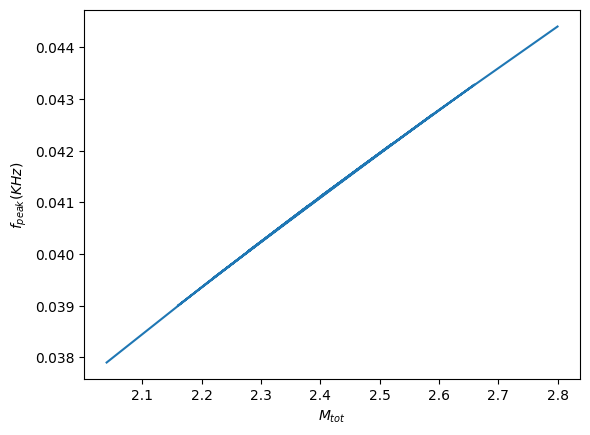

In [29]:
#Plotting 
plot.plot(Mtot,fpeak)
plot.ylabel("$f_{peak} (KHz)$")
plot.xlabel("$M_{tot}$")